# Workflow to analyze the Palmer Penguins Dataset Extended

Author: Nhu-Nguyen Pham

Import necessary packages:

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import kagglehub

/home/nyu/miniforge/envs/BioDaten_01/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download dataset
Either download dataset manually from Download dataset from [Kaggle](https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended) \
or use kagglehub to automatically get dataset:

In [4]:
# This is a simple example of how to use the kagglehub package to download a dataset from Kaggle.
# Download latest version

path = kagglehub.dataset_download("samybaladram/palmers-penguin-dataset-extended")

print("Path to dataset files:", path)

Path to dataset files: /home/nyu/.cache/kagglehub/datasets/samybaladram/palmers-penguin-dataset-extended/versions/2


## Read downloaded file
Open downloaded file (here: the one via kagglehub) and read csv as panda dataframe.

In [ ]:
with open(path + "/palmerpenguins_extended.csv") as f:
    df = pd.read_csv(f)
    print(df.head())

  species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            53.4           17.8              219.0   
1  Adelie  Biscoe            49.3           18.1              245.0   
2  Adelie  Biscoe            55.7           16.6              226.0   
3  Adelie  Biscoe            38.0           15.6              221.0   
4  Adelie  Biscoe            60.7           17.9              177.0   

   body_mass_g     sex  diet life_stage health_metrics  year  
0       5687.0  female  fish      adult     overweight  2021  
1       6811.0  female  fish      adult     overweight  2021  
2       5388.0  female  fish      adult     overweight  2021  
3       6262.0  female  fish      adult     overweight  2021  
4       4811.0  female  fish   juvenile     overweight  2021  


In [54]:
print(df.shape)

(3430, 11)


### List all column names/categories to get an overview

In [7]:
print(df.columns)

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'diet', 'life_stage',
       'health_metrics', 'year'],
      dtype='object')


List all species: Identify the different species present

In [6]:
print(df.species.unique())

['Adelie' 'Chinstrap' 'Gentoo']


List all islands

In [12]:
print(df.island.unique())

['Biscoe' 'Dream' 'Torgensen']


List all diets

In [11]:
print(df.diet.unique())

['fish' 'krill' 'parental' 'squid']


List all life_stages

In [10]:
print(df.life_stage.unique())

['adult' 'juvenile' 'chick']


List all health_metrics

In [9]:
print(df.health_metrics.unique())

['overweight' 'healthy' 'underweight']


List years

In [8]:
print(df.year.unique())

[2021 2022 2023 2024 2025]


Distribution of key features: 
* 'bill_length_mm'
* 'bill_depth_mm'
* 'flipper_length_mm'
* 'body_mass_g'

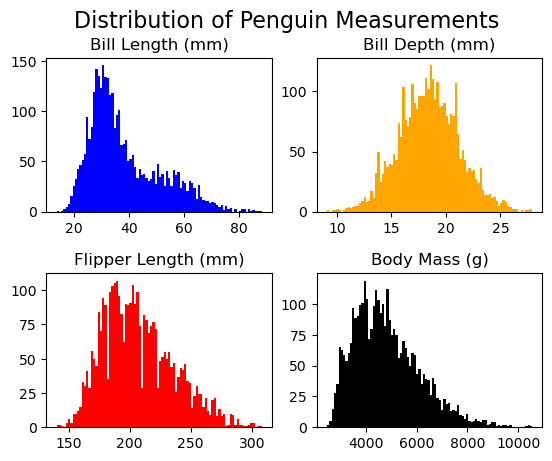

In [43]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Distribution of Penguin Measurements', fontsize=16)
fig.subplots_adjust(hspace=0.4, wspace=0.2)
ax1.set_title('Bill Length (mm)')
ax1.hist(df.bill_length_mm, bins=90, color='blue')
ax2.set_title('Bill Depth (mm)')
ax2.hist(df.bill_depth_mm, bins=90, color='orange')
ax3.set_title('Flipper Length (mm)')
ax3.hist(df.flipper_length_mm, bins=90, color='red')
ax4.set_title('Body Mass (g)')
ax4.hist(df.body_mass_g, bins=90, color='black')

plt.show()


#### Distribution of Key Features by Species:

Visualization by histograms:

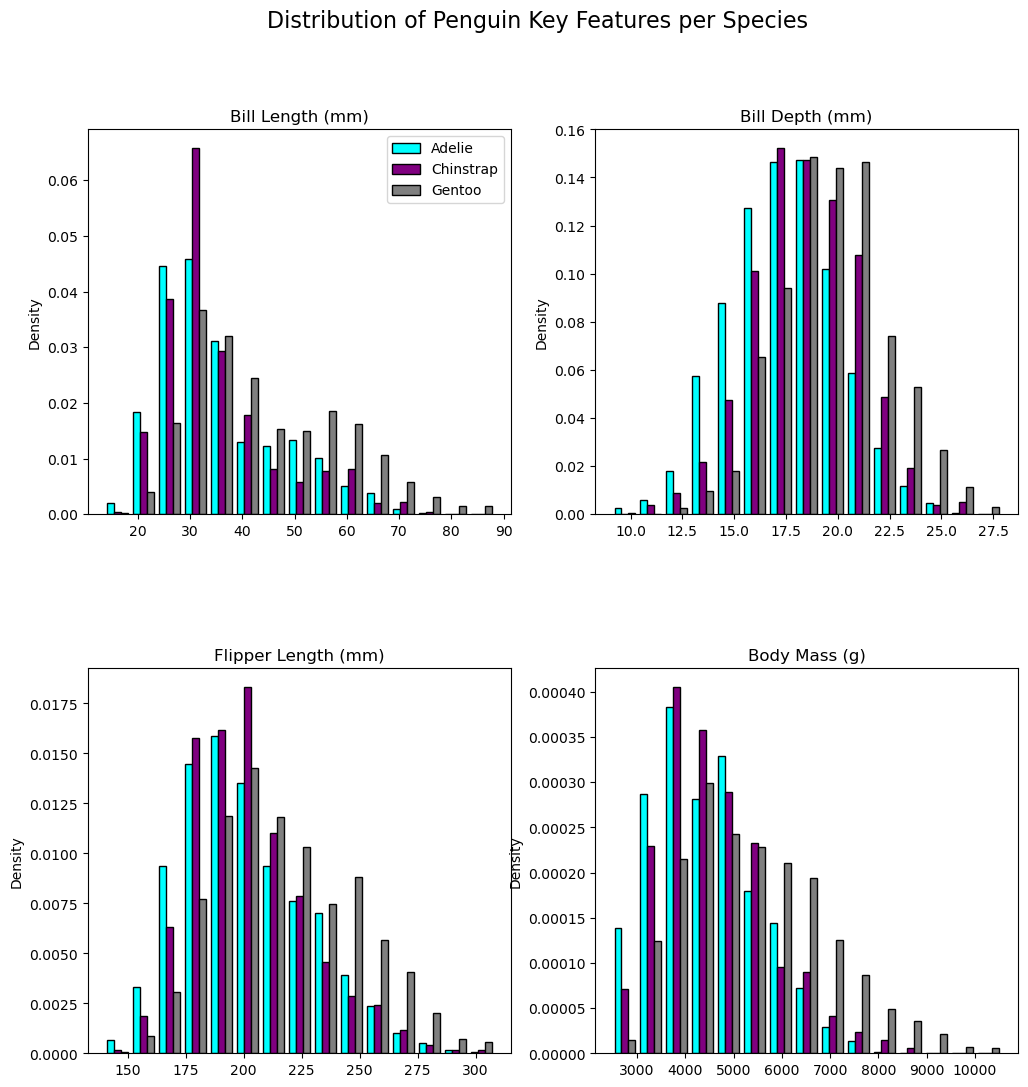

In [79]:
# Creating a "overlay" or stacked histogram

# species = ['Adelie' 'Chinstrap' 'Gentoo']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Distribution of Penguin Key Features per Species', fontsize=16)
fig.subplots_adjust(hspace=0.4, wspace=0.2)
fig.set_figheight(12)
fig.set_figwidth(12)


ax1.set_title('Bill Length (mm)')
ax1.hist([df[df.species =='Adelie']['bill_length_mm'],
           df[df.species =='Chinstrap']['bill_length_mm'],
           df[df.species =='Gentoo']['bill_length_mm']],
             bins=15, stacked=False, color=['cyan', 'Purple', 'grey'], edgecolor='black', density=True)
ax1.set_ylabel('Density')
ax1.legend(['Adelie', 'Chinstrap', 'Gentoo'], loc='upper right')
ax2.set_title('Bill Depth (mm)')
ax2.hist([df[df.species =='Adelie']['bill_depth_mm'],
           df[df.species =='Chinstrap']['bill_depth_mm'],
           df[df.species =='Gentoo']['bill_depth_mm']],
             bins=15, stacked=False, color=['cyan', 'Purple', 'grey'], edgecolor='black', density=True)
ax2.set_ylabel('Density')
ax3.set_title('Flipper Length (mm)')
ax3.hist([df[df.species =='Adelie']['flipper_length_mm'],
           df[df.species =='Chinstrap']['flipper_length_mm'],
           df[df.species =='Gentoo']['flipper_length_mm']],
             bins=15, stacked=False, color=['cyan', 'Purple', 'grey'], edgecolor='black', density=True)
ax3.set_ylabel('Density')
ax4.set_title('Body Mass (g)')
ax4.hist([df[df.species =='Adelie']['body_mass_g'],
           df[df.species =='Chinstrap']['body_mass_g'],
           df[df.species =='Gentoo']['body_mass_g']],
             bins=15, stacked=False, color=['cyan', 'Purple', 'grey'], edgecolor='black', density=True)
ax4.set_ylabel('Density')

plt.show()

Can difference be visualized better as boxplots?

/tmp/ipykernel_7377/3656887437.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([Adelie['bill_length_mm'], Chinstrap['bill_length_mm'], Gentoo['bill_length_mm']], labels=['Adelie', 'Chinstrap', 'Gentoo'])
/tmp/ipykernel_7377/3656887437.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([Adelie['bill_depth_mm'], Chinstrap['bill_depth_mm'], Gentoo['bill_depth_mm']], labels=['Adelie', 'Chinstrap', 'Gentoo'])
/tmp/ipykernel_7377/3656887437.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot([Adelie['flipper_length_mm'], Chinstrap['flipper_length_mm'], Gentoo['flipper_length_mm']],

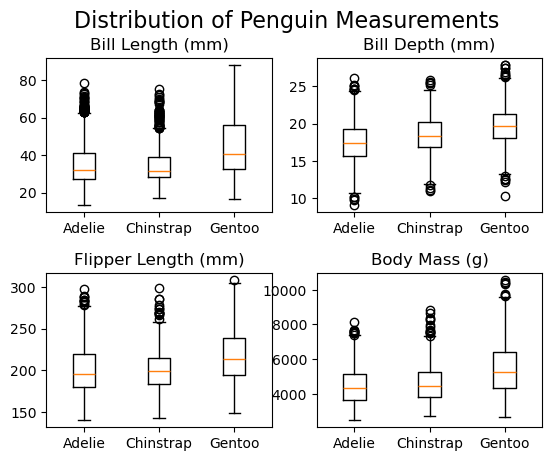

In [84]:
Adelie = df[df.species =='Adelie']
Chinstrap = df[df.species =='Chinstrap']
Gentoo = df[df.species =='Gentoo']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Distribution of Penguin Measurements', fontsize=16)
fig.subplots_adjust(hspace=0.4, wspace=0.2)
ax1.set_title('Bill Length (mm)')
ax1.boxplot([Adelie['bill_length_mm'], Chinstrap['bill_length_mm'], Gentoo['bill_length_mm']], labels=['Adelie', 'Chinstrap', 'Gentoo'])
ax2.set_title('Bill Depth (mm)')
ax2.boxplot([Adelie['bill_depth_mm'], Chinstrap['bill_depth_mm'], Gentoo['bill_depth_mm']], labels=['Adelie', 'Chinstrap', 'Gentoo'])
ax3.set_title('Flipper Length (mm)')
ax3.boxplot([Adelie['flipper_length_mm'], Chinstrap['flipper_length_mm'], Gentoo['flipper_length_mm']], labels=['Adelie', 'Chinstrap', 'Gentoo'])
ax4.set_title('Body Mass (g)')
ax4.boxplot([Adelie['body_mass_g'], Chinstrap['body_mass_g'], Gentoo['body_mass_g']], labels=['Adelie', 'Chinstrap', 'Gentoo'])

plt.show()


Distinguishing species by just one Feature is difficult. How about two?

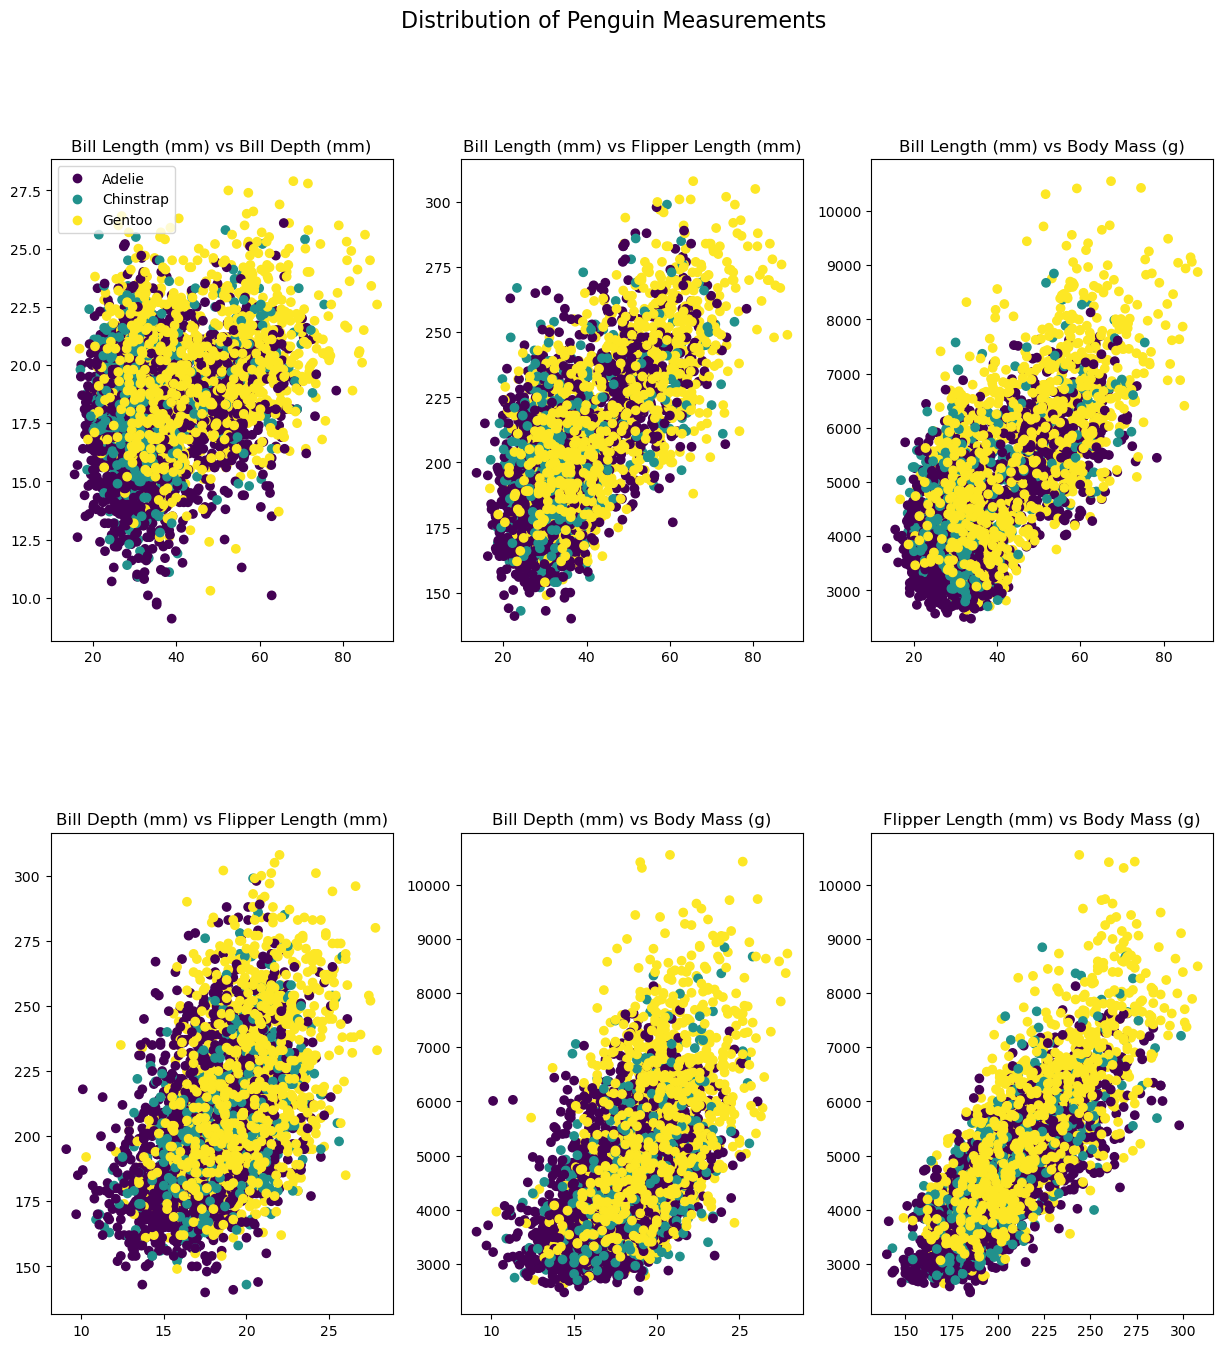

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
fig.suptitle('Distribution of Penguin Measurements', fontsize=16)
fig.subplots_adjust(hspace=0.4, wspace=0.2)
fig.set_figheight(15)
fig.set_figwidth(15)

ax1.set_title('Bill Length (mm) vs Bill Depth (mm)')
sc = ax1.scatter(df['bill_length_mm'], df['bill_depth_mm'], c=df["species"].astype("category").cat.codes, cmap="viridis")
handles, labels = sc.legend_elements()
ax1.legend(handles, df["species"].astype("category").cat.categories, loc="upper left")

ax2.set_title('Bill Length (mm) vs Flipper Length (mm)')
ax2.scatter(df['bill_length_mm'], df['flipper_length_mm'], c=df["species"].astype("category").cat.codes, cmap="viridis")

ax3.set_title('Bill Length (mm) vs Body Mass (g)')
ax3.scatter(df['bill_length_mm'], df['body_mass_g'], c=df["species"].astype("category").cat.codes, cmap="viridis")

ax4.set_title('Bill Depth (mm) vs Flipper Length (mm)')
ax4.scatter(df['bill_depth_mm'], df['flipper_length_mm'], c=df["species"].astype("category").cat.codes, cmap="viridis")


ax5.set_title('Bill Depth (mm) vs Body Mass (g)')
ax5.scatter(df['bill_depth_mm'], df['body_mass_g'], c=df["species"].astype("category").cat.codes, cmap="viridis")


ax6.set_title('Flipper Length (mm) vs Body Mass (g)')
ax6.scatter(df['flipper_length_mm'], df['body_mass_g'], c=df["species"].astype("category").cat.codes, cmap="viridis")

plt.show()
* 'bill_length_mm'
* 'bill_depth_mm'
* flipper_length_mm'
* 'body_mass_g',

## Plot sex-dependent bodymass

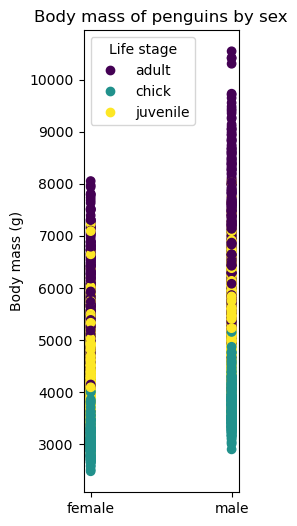

In [18]:
plt.figure(figsize=(2, 6))
sc = plt.scatter(x=df['sex'], y=df["body_mass_g"], c=df["life_stage"].astype("category").cat.codes, cmap="viridis")
plt.title("Body mass of penguins by sex")
plt.ylabel("Body mass (g)")

handles, labels = sc.legend_elements()
plt.legend(handles, df["life_stage"].astype("category").cat.categories, title="Life stage", loc="upper left")

plt.show()

## Conclusion

Key features: * 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm' and 'body_mass_g' \
Distinguishing between species through given Key Features is not easy. There is great overlap between species. \
Several features should be taken into considerations. Furthermore, subcategorizing by other features, such as life stage and health could make it more clear. \
On the other hand, distinguishing between male and female penguins might be done via bodyweight. \
Female penguins seem to have lower body mass than male penguins at all life stages.

## SessionInfo
python 3.10.17 \
numpy 2.2.5 \
pandas 2.2.3\
kagglehub 0.3.8